In [ ]:
# Load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
from datetime import datetime

In [ ]:
# Load and preprocess data
df = pd.read_csv('5_nighttimelight_UK.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df_filtered = df[df['DATE'] >= '1992-09-01']

# Select relevant columns and rename
plot_df = df_filtered[['DATE', 'ONS_raw', 'con_MLP', 'con_LSTM', 'con_XGB', 'con_ENET']].copy()


model_labels = {
    "ONS_raw": "ONS Monthly GDP",
    "con_MLP": "MLP",
    "con_LSTM": "LSTM",
    "con_XGB": "XGB",
    "con_ENET": "ENET"
}

# Melt the dataframe
melted_df = plot_df.melt(id_vars='DATE', var_name='Model', value_name='Value')

# Apply readable model labels AFTER melting
melted_df['Model'] = melted_df['Model'].map(model_labels)

# Define colors and line styles
model_colors = {
    "ONS Monthly GDP": "#000000",     # black
    "ENET": "#4D4D4D",                # gray30
    "LSTM": "#7F7F7F",                # gray50
    "MLP": "#999999",                 # gray60
    "XGB": "#B3B3B3"                  # gray70
}

model_linetypes = {
    "ONS Monthly GDP": "solid",
    "ENET": "solid",
    "LSTM": "dashed",
    "MLP": "dotted",
    "XGB": "dashdot"
}

/var/folders/1b/b3lsjhy10fsd753tw_292d5w0000gn/T/ipykernel_16562/2792285280.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE'] = pd.to_datetime(df['DATE'])


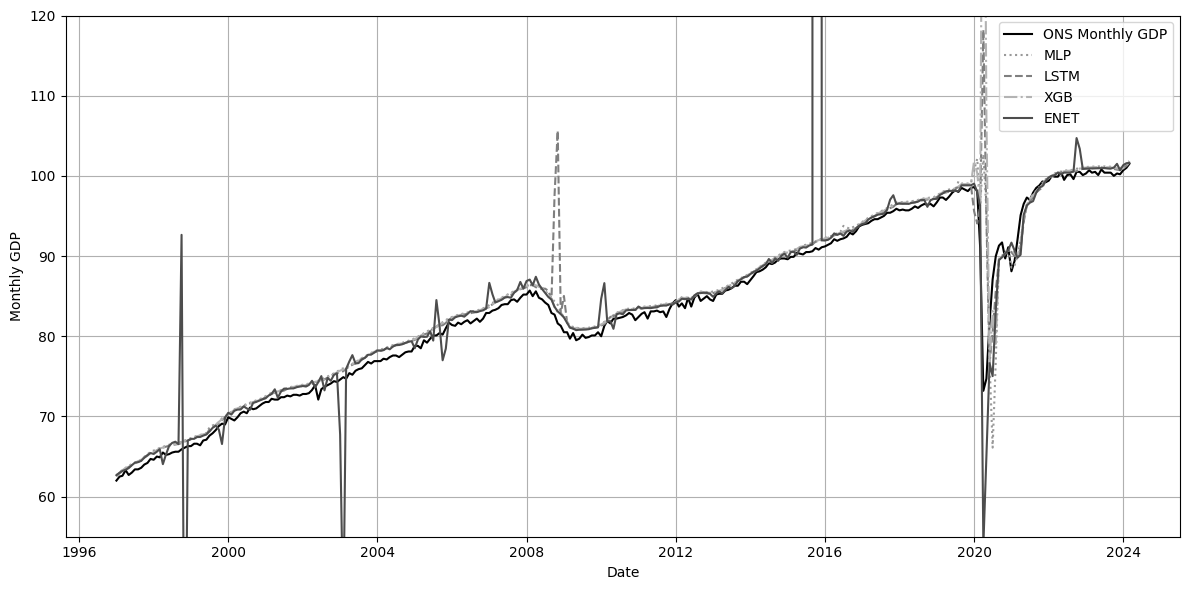

In [5]:
import matplotlib.pyplot as plt

raw_df = df_filtered[['DATE', 'ONS_raw', 'con_MLP', 'con_LSTM', 'con_XGB', 'con_ENET']].copy()

model_names = {
    "ONS_raw": "ONS Monthly GDP",
    'con_MLP': 'MLP',
    'con_LSTM': 'LSTM',
    'con_XGB': 'XGB',
    'con_ENET': 'ENET'
}

plt.figure(figsize=(12, 6))

plt.plot(raw_df['DATE'], raw_df['ONS_raw'],
         label=model_names['ONS_raw'],
         color=model_colors["ONS Monthly GDP"],
         linestyle=model_linetypes["ONS Monthly GDP"])

# Plot all models
for col in ['con_MLP', 'con_LSTM', 'con_XGB', 'con_ENET']:
    plt.plot(raw_df['DATE'], raw_df[col],
             label=model_names[col],
             color=model_colors.get(model_names[col], '#888888'),
             linestyle=model_linetypes.get(model_names[col], 'solid'))

plt.ylim(55, 120)

plt.ylabel("Monthly GDP")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

models = ['MLP', 'LSTM', 'XGB', 'ENET']
results = []

for model in models:
    con_col = f'con_{model}'
    con_valid = df_filtered[['ONS_raw', con_col]].dropna()
    y_true_con = con_valid['ONS_raw']
    y_pred_con = con_valid[con_col]

    ann_col = f'ann_{model}'
    ann_valid = df_filtered[['ONS', ann_col]].dropna()
    y_true_ann = ann_valid['ONS']
    y_pred_ann = ann_valid[ann_col]

    mae = mean_absolute_error(y_true_con, y_pred_con)
    rmse = mean_squared_error(y_true_con, y_pred_con) ** 0.5
    corr = np.corrcoef(y_true_con, y_pred_con)[0, 1]
    sign_acc = (np.sign(y_true_ann) == np.sign(y_pred_ann)).mean()

    results.append({
        'Model': model,
        'MAE': mae,
        'RMSE': rmse,
        'Correlation': corr,
        'Sign Accuracy': sign_acc
    })

results_df = pd.DataFrame(results)
print(results_df)



  Model        MAE        RMSE  Correlation  Sign Accuracy
0   MLP   1.212757    2.663889     0.971723       0.928571
1  LSTM   1.176287    3.334704     0.954282       0.906832
2   XGB   1.323331    5.732762     0.872964       0.909938
3  ENET  49.364908  779.261949     0.056286       0.807453
